## Coffee Shop Sales Analysis

This study utilizes a dataset [Coffee Shop Sales Analysis](https://www.kaggle.com/datasets/divu2001/coffee-shop-sales-analysis/data) sourced from Kaggle , which contains detailed sales data from a coffee shop.

### Dataset Overview

The dataset offers a comprehensive view of coffee shop sales, providing insights into sales performance, customer preferences, and revenue trends. The primary objectives of this analysis are to explore sales patterns, identify top-selling products, and forecast future sales.

### Data Attributes

The dataset comprises the following key attributes:
- **Transaction ID**: Unique identifier for each transaction.
- **Transaction Date**: The date on which the transaction occurred.
- **Transaction Time**: The time of the day the transaction took place.
- **Store ID**: Identifier for the store where the transaction occurred.
- **Store Location**: Location of the store.
- **Product ID**: Identifier for the product sold.
- **Transaction Quantity**: Number of units sold in the transaction.
- **Unit Price**: Price per unit of the product.
- **Total Bill**: Total sales value for the transaction (calculated as Transaction Quantity * Unit Price).
- **Product Category**: Category of the product sold.
- **Other Attributes**: Additional details that may be relevant for further analysis.

### Analysis Goals

In this study, we will perform a series of data analyses and visualizations to achieve the following goals:
- **Identify Sales Trends**: Analyze sales data to identify trends and patterns over different periods.
- **Top Selling Products**: Determine which products are top sellers and explore any correlations with time or seasons.
- **Customer Behavior Analysis**: Study customer purchase behavior to understand peak shopping times and common purchase patterns.
- **Revenue Forecasting**: Develop predictive models to forecast future sales based on historical data.


In [16]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt 
from pathlib import Path
import calendar

In [2]:
dataset_path = Path.cwd() / "datasets"

df = pd.read_csv(dataset_path / "Project.csv")
df.head()

,transaction_id,transaction_date,transaction_time,store_id,store_location,product_id,transaction_qty,unit_price,Total_Bill,product_category,product_type,product_detail,Size,Month Name,Day Name,Hour,Month,Day of Week
0,114301,01-06-2023,11:33:29,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Thursday,11,6,3
1,115405,02-06-2023,11:18:24,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,11,6,4
2,115478,02-06-2023,12:02:45,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,12,6,4
3,116288,02-06-2023,19:39:47,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Friday,19,6,4
4,116714,03-06-2023,12:24:57,3,Astoria,45,1,3.0,3.0,Tea,Brewed herbal tea,Peppermint,Large,June,Saturday,12,6,5


<Axes: xlabel='Month Name', ylabel='count'>

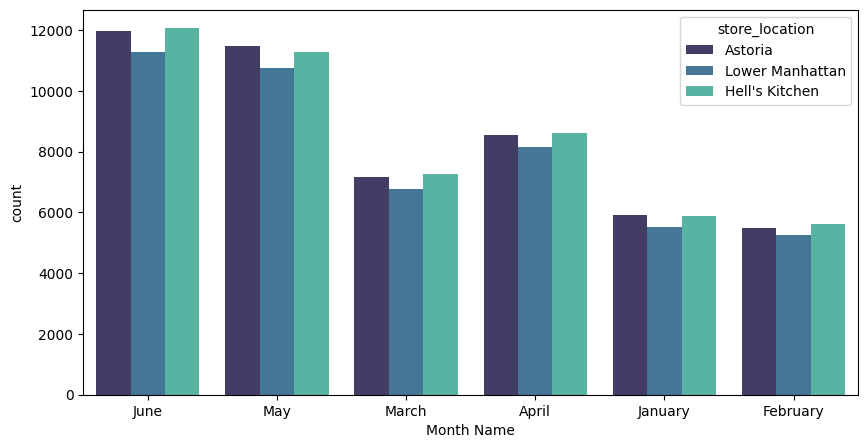

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Month Name", hue="store_location", palette="mako")

* The chart shows that the months of May and June displays highest amount of sales for these three store locations.

<Axes: xlabel='product_category', ylabel='count'>

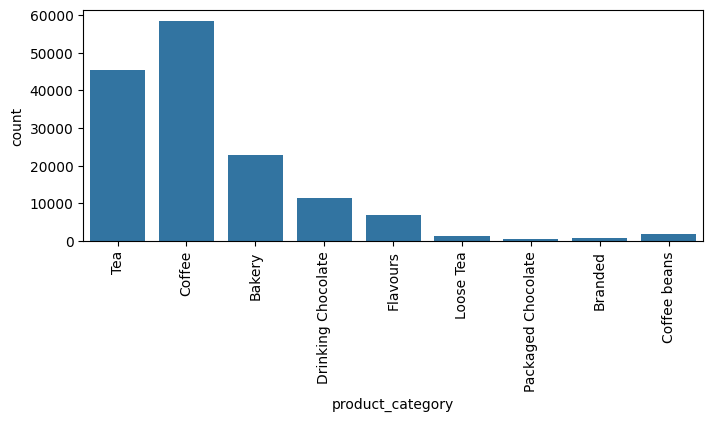

In [11]:
plt.figure(figsize=(8,3))
plt.xticks(rotation=90)
sns.countplot(x=df['product_category'])

<Axes: xlabel='product_type', ylabel='count'>

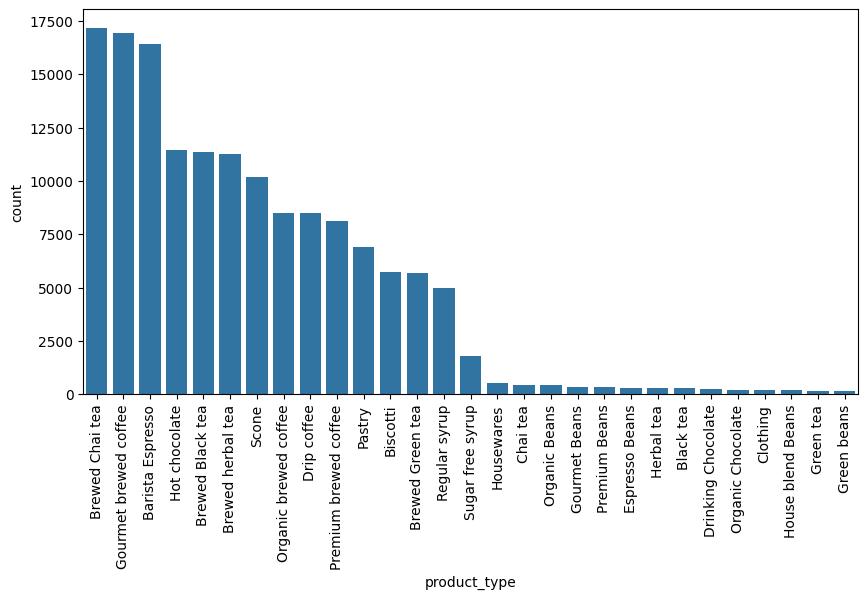

In [12]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(data=df, 
              x="product_type",
              order=df['product_type'].value_counts().index
              )

* Coffee stands out as the topmost product purchased across three different stores, indicating its overwhelming popularity among customers. The consistently high sales of coffee highlight its essential role in driving revenue and attracting a steady flow of patrons. In contrast, packaged chocolate is the least bought item, suggesting a lower demand or preference among the clientele. This disparity in sales figures underscores the varying tastes and consumption habits of the customers, emphasizing the importance of stocking popular items like coffee to maintain high sales volumes, while reconsidering the inventory strategy for less popular products such as packaged chocolate.

<Axes: xlabel='Hour', ylabel='count'>

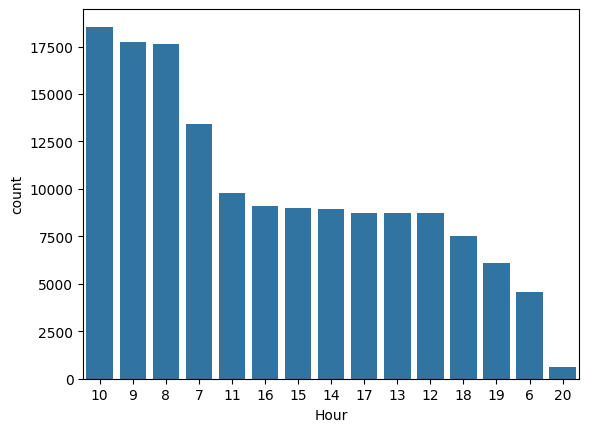

In [13]:
sns.countplot(x=df['Hour'], order=df['Hour'].value_counts().index)

<Axes: xlabel='Day Name', ylabel='count'>

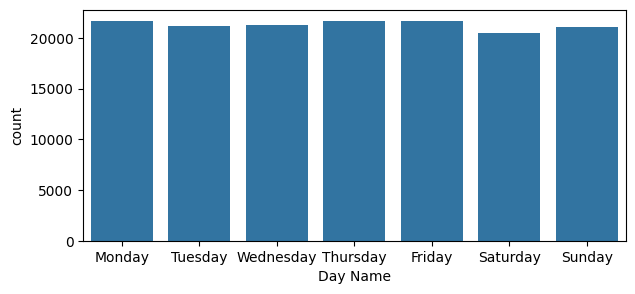

In [17]:
plt.figure(figsize=(7,3))
sns.countplot(x=df['Day Name'],
              order=calendar.day_name)